# Nuclear area as a function of cell line

The question: Is the mean nuclear area different among six different celll lines?

Test: ANOVA test on six groups 

large F statistic supports the alternative hypothesis


Response variable: Area of cell nucleus. This is a continuous variable.


Predictor variable: Cell line, A-F . This is a categorical variable as there are 6 discrete categories.


Parameters and hypotheses

  $\mu_A$ = Cell line 'BC_N_FN_A' 
  
  $\mu_B$ = Cell line 'BC_N_FN_B' 
   
  $\mu_C$ = Cell line 'BC_LM_FN_A' 
    
  $\mu_D$ = Cell line 'BC_LM_FN_B' 
 
  $\mu_E$ = Cell line 'BC_HM_FN_A'
 
  $\mu_F$ = Cell line 'BC_HM_FN_B'
  

Null Hypothesis: There is no difference between the average nuclear area among the 6 cell liens cell lines. 

 $H_0$: $\mu_A$ = $\mu_B$ = $\mu_C$ = $\mu_D$ = $\mu_E$ = $\mu_F$ 
 
Alternative hypothesis: One or more of the cell lines has a significantly different average nuclear area.
   
 $H_A$: $\mu_A$ ≠ $\mu_B$ ≠ $\mu_C$ ≠ $\mu_D$ ≠  $\mu_E$ ≠ $\mu_F$
 
The data: This data was collected by fellow lab mates at Colorado State Univeristy in the lab of Dr. Ashok Prasad. 

This script: This code was written by Rosaline A. Danzman, PhD student in the lab of Dr. Ashok Prasad, Department of Chemical and Biological Engineering at Colorado State University.

In [67]:
# Load libraries
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns

# load dataframe and view how many rows and columns (shape). Drop NAN values and recheck shape.
data_sheet = "All2018Apr1.xlsx"
df = pd.read_excel(data_sheet)
print(df.head)
print("shape: ",df.shape)
print("shape after dropping NAN: ",df.dropna().shape)

<bound method NDFrame.head of       Cell_Line  Slide_Index  Cell_Index  Neighbor_Per  Cell_Area  \
0     BC_N_FN_A           16           1             0      21615   
1     BC_N_FN_A           16           4             0       9515   
2     BC_N_FN_A           16           5             0       5484   
3     BC_N_FN_A           17           2             0       8188   
4     BC_N_FN_A           17           3             0       9680   
..          ...          ...         ...           ...        ...   
595  BC_HM_FN_B            9          13             0       5734   
596  BC_HM_FN_B            9          14             0       5318   
597  BC_HM_FN_B            9          15             0       5121   
598  BC_HM_FN_B           12           6             0       4274   
599  BC_HM_FN_B           12           7             0       7551   

     Cell_Perimeter  Cell_Major  Cell_Minor  Cell_Circularity  \
0          1172.380  203.524525  137.126904          0.197619   
1          

In [24]:
# create a new dataframe with only the comlumns for nuclear measurements
nuc_columns = df.columns[df.columns.str.contains(substring, case = False)]
keep_columns = ['Cell_Line'] + nuc_columns.tolist()

df_nuc = df.loc[:, keep_columns]
print("shape: ", df_nuc.shape)
print("shape after dropping NAN: ", df_nuc.dropna().shape) 

shape:  (600, 11)
shape after dropping NAN:  (600, 11)


In [26]:
# get list of cell lines - uniques from cell line column 
cell_line = "Cell_Line"
print(df_nuc[cell_line].unique())

# get size of unique list - how many cell lines are there
k = len(df_nuc[cell_line].unique()) # number of cell lines
print(k)

# get number of observations for each cell line 
n = df_nuc[cell_line].value_counts()
print(n)

['BC_N_FN_A' 'BC_N_FN_B' 'BC_LM_FN_A' 'BC_LM_FN_B' 'BC_HM_FN_A'
 'BC_HM_FN_B']
6
BC_N_FN_A     100
BC_N_FN_B     100
BC_LM_FN_A    100
BC_LM_FN_B    100
BC_HM_FN_A    100
BC_HM_FN_B    100
Name: Cell_Line, dtype: int64


Cell_Line
BC_HM_FN_A    1949.89
BC_HM_FN_B    1976.87
BC_LM_FN_A    2800.70
BC_LM_FN_B    2653.75
BC_N_FN_A     1865.46
BC_N_FN_B     1790.00
Name: Nuc_Area, dtype: float64


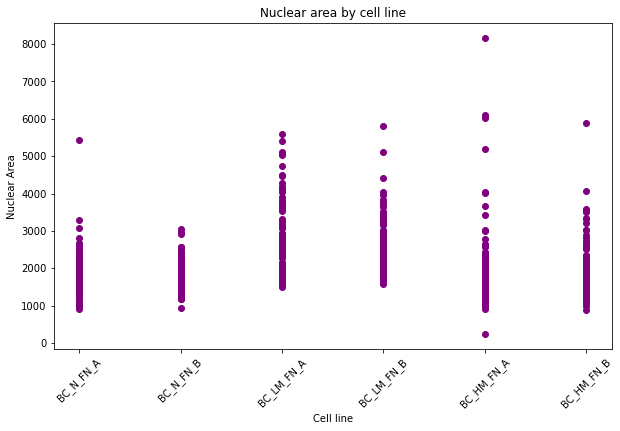

In [56]:
# plot the data to visualize
plt.figure(figsize = (10,6))
plt.scatter(df_nuc['Cell_Line'], df_nuc['Nuc_Area'], color = 'purple', marker = 'o')
plt.title('Nuclear area by cell line')
plt.xlabel('Cell line')
plt.ylabel('Nuclear Area')
plt.xticks(rotation = 45)
plt.show()

Cell_Line
BC_HM_FN_A    1949.89
BC_HM_FN_B    1976.87
BC_LM_FN_A    2800.70
BC_LM_FN_B    2653.75
BC_N_FN_A     1865.46
BC_N_FN_B     1790.00
Name: Nuc_Area, dtype: float64


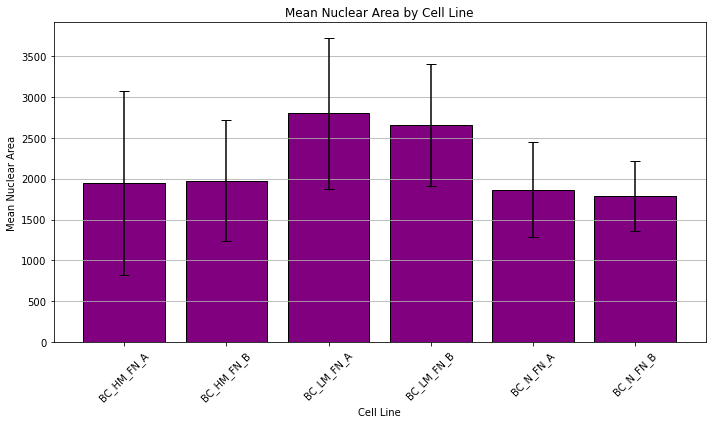

In [65]:
# Mean Nuclear Area by cell line

# means per cell line for nuclear area with box plot of data
means_area = df_nuc.groupby('Cell_Line')['Nuc_Area'].mean()
print(means_area)
std_devs = df_nuc.groupby('Cell_Line')['Nuc_Area'].std()

# Bar plot with standard deviation error bars
plt.figure(figsize=(10, 6))
x = np.arange(len(means_area))
plt.bar(x, means_area.values, yerr=std_devs.values, capsize=5, color='purple', edgecolor='black')
plt.xticks(x, means_area.index, rotation=45)
plt.xlabel('Cell Line')
plt.ylabel('Mean Nuclear Area')
plt.title('Mean Nuclear Area by Cell Line')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



In [66]:
# ANOVA
alpha = 0.05
# ANOVA - nuclear area by cell line
data_nuc_area = [df_nuc[df_nuc['Cell_Line'] == cell_line]['Nuc_Area'] for cell_line in df_nuc['Cell_Line'].unique()]

anova_nuc_area = f_oneway(*data_nuc_area)
print(anova_nuc_area)

p_val = anova_nuc_area.pvalue

if p_val < alpha:
    print(f"With a p-value of {p_val}, we reject the null hypothesis and conclude that there is a stistically signfiicant difference between the mean nuclear area of each group")
else: 
    print(f"With a p-value of {p_val}, there is insufficient evidence that the mean nuclear area of any cell line is significantly different from the others.")



F_onewayResult(statistic=30.503067258200566, pvalue=1.21395333234755e-27)
With a p-value of 1.21395333234755e-27, we reject the null hypothesis and conclude that there is a stistically signfiicant difference between the mean nuclear area of each group


       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1     group2   meandiff p-adj    lower      upper   reject
-----------------------------------------------------------------
BC_HM_FN_A BC_HM_FN_B    26.98 0.9999  -292.9094  346.8694  False
BC_HM_FN_A BC_LM_FN_A   850.81    0.0   530.9206 1170.6994   True
BC_HM_FN_A BC_LM_FN_B   703.86    0.0   383.9706 1023.7494   True
BC_HM_FN_A  BC_N_FN_A   -84.43 0.9748  -404.3194  235.4594  False
BC_HM_FN_A  BC_N_FN_B  -159.89 0.7093  -479.7794  159.9994  False
BC_HM_FN_B BC_LM_FN_A   823.83    0.0   503.9406 1143.7194   True
BC_HM_FN_B BC_LM_FN_B   676.88    0.0   356.9906  996.7694   True
BC_HM_FN_B  BC_N_FN_A  -111.41 0.9193  -431.2994  208.4794  False
BC_HM_FN_B  BC_N_FN_B  -186.87 0.5522  -506.7594  133.0194  False
BC_LM_FN_A BC_LM_FN_B  -146.95 0.7776  -466.8394  172.9394  False
BC_LM_FN_A  BC_N_FN_A  -935.24    0.0 -1255.1294 -615.3506   True
BC_LM_FN_A  BC_N_FN_B  -1010.7    0.0 -1330.5894 -690.8106   True
BC_LM_FN_B

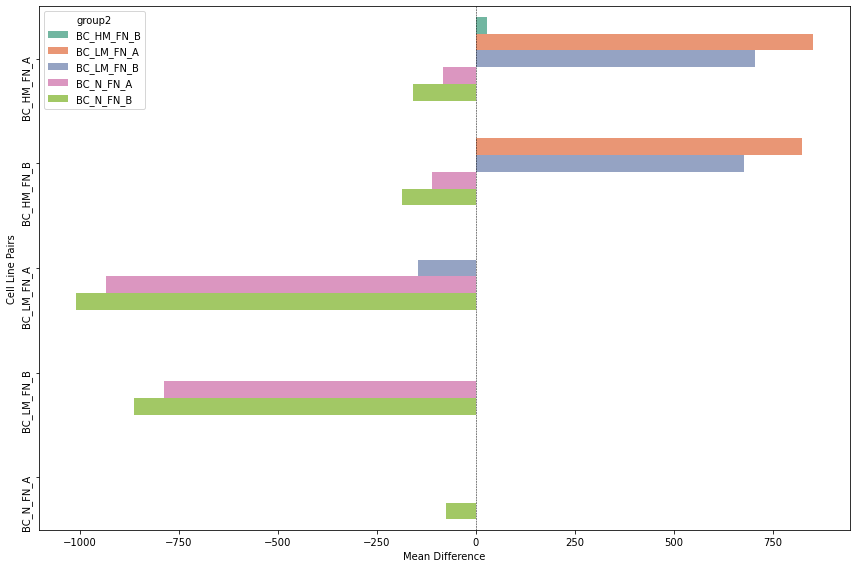

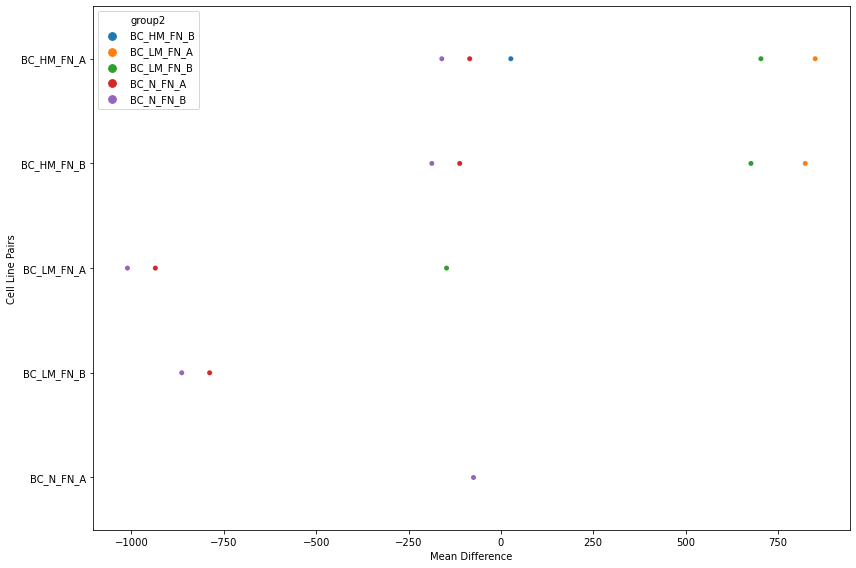

In [84]:
# Tukey comparison of means and pairwaise comparison plot
tukey_results = pairwise_tukeyhsd(df_nuc['Nuc_Area'], df_nuc['Cell_Line'])
print(tukey_results.summary())

# convert table to data frame
tukey_df = pd.DataFrame(data = tukey_results._results_table.data[1:], columns = tukey_results._results_table.data[0])

# bar plot with the mean differences for each pair of cell lines on the x-axis
plt.figure(figsize = (12, 8))
sns.barplot(x = 'meandiff', y = 'group1', hue = 'group2', data = tukey_df, ci = None, palette = 'Set2')
plt.axvline(0, color = 'black', linestyle = '--', linewidth = 0.5)
plt.xlabel('Mean Difference')
plt.ylabel('Cell Line Pairs')
plt.yticks(rotation = 90)
plt.tight_layout()
plt.show()
